# Assessment Review

The topics covered will be:

1. Normal Distributions
2. Statistical Tests
3. Bayesian Statistics
4. Linear Regression

In [1]:
from src.call import call_on_students

## Part 1: Normal Distributions

In this part, you will analyze hours of sleep for Freshman at a University. We know that the population distribution of hours of sleep for Freshman at the University is normally distributed with a mean of 6 and a standard deviation of 2.

### Task 1: Create a numeric variable `z_eight` that contains the z-score for a Freshman that sleeps 8 hours 

In [2]:
call_on_students(1)

['Max']


In [3]:
# Code here
# need mu and sigma and x
x = 8
mu = 6
S = 2
z_eight = (x - mu) / S
z_eight

1.0

### Task 2: Create a numeric variable `over_eight` containing the approximate proportion of Freshman who get more than 8 hours of sleep

In [5]:
from scipy import stats

In [4]:
call_on_students(1)

['Charlie']


In [7]:
# Code here
over_eight = 1 - stats.norm(loc=mu, scale=S).cdf(8)
over_eight

0.15865525393145707

In [11]:
1 - stats.norm.cdf(z_eight)

0.15865525393145707

In [9]:
stats.norm.sf(z_eight)

0.15865525393145707

### Task 3: Calculate a 95% confidence interval for the amount of sleep for one Freshman who sleeps 7 times with a mean of 5 hours and a standard deviation of 0.5 hours

In [12]:
call_on_students(1)

['Keanan']


In [14]:
# Code here
x_bar = 5
std = 0.5
n = 7
se = std / (n ** 0.5)

In [17]:
stats.t.interval(alpha=.95, # confidence level
                loc=x_bar, # mean
                scale=se, # standard error
                df=n-1)

(4.53757712628571, 5.46242287371429)

In [18]:
t_value = stats.t.ppf(0.975, n-1)
samp_standard_error = std/(n**.5)
margin_error = t_value * samp_standard_error
margin_error

0.4624228737142907

In [19]:
x_bar - margin_error, x_bar + margin_error

(4.53757712628571, 5.46242287371429)

### Task 4: Interpret the 95% Confidence Interval that you derived in the above question

In [20]:
call_on_students(1)

['Anat']


Interpret: 

- A 95% confidence interval means, there is a 95% chance for the interval to contain our true population mean. There is a 95% chance that the true population mean of this freshmans sleep hours falls between 4.54 hours and 5.46 hours


## Part 2: Hypothesis Testing

Let's make some hypotheses about cars!

### Task 5: Set Up

In [21]:
call_on_students(1)

['Hera']


In [22]:
# Imports - need pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# Import the auto-mpg csv from the data folder
df = pd.read_csv("data/auto-mpg.csv")

In [26]:
# Check the head of our data
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [27]:
# Check the info on our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [28]:
# Describe the data
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [29]:
df['cylinders'].value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

In [30]:
df['origin'].value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

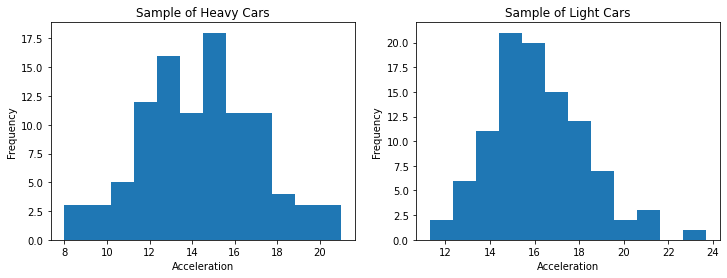

In [31]:
# Run this cell without changes to set up for the next set of questions

# Grabbing the median car weight
weight_median = df['weight'].median()

# Separating based on light cars and heavy cars
heavy_cars = df.loc[df['weight'] > weight_median].sample(n=100, random_state=42)
light_cars = df.loc[df['weight'] <= weight_median].sample(n=100, random_state=42)

# Plotting histograms for acceleration for both light and heavy cars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Heavy Cars')
ax1.set_xlabel('Acceleration')
ax1.set_ylabel('Frequency')
ax1.hist(heavy_cars['acceleration'], bins=12)

ax2.set_title('Sample of Light Cars')
ax2.set_xlabel('Acceleration')
ax2.set_ylabel('Frequency')
ax2.hist(light_cars['acceleration'], bins=12)
plt.show()

### The Prompt: 

> Car manufacturers want to know if light cars accelerate different than heavy cars.

### Task 6: Set up the null and alternative hypotheses for this test

In [32]:
call_on_students(1)

['Mahum']


**Null hypothesis:**

- The mean acceleration of light cars is not different from the mean acceleration of heavy cars


**Alternative hypothesis:**

- The mean acceleration of the light is signficantly different from the mean accerlation of the heavy cars


### Task 7: Describe your Type 1 and Type 2 errors in this context

In [33]:
call_on_students(1)

['Stephanie']


**Type I Error:**

- Reject null, when we shoudn't, false postive: Our test shows that the mean acceleration of light cars is significantly different than the mean acceleration of heavy cars when in reality there is no difference in acceleration: 1 to 1 relation to our alpha (threshold)


**Type II Error:**

- Fail to reject null, when we should have, false negative: The mean acceleration of light cars is not significantly different from the mean acceleration of heavy cars when in reality there is a difference



### Task 8: The Hypothesis Test!

### 8a: Describe the type of test:

In [34]:
call_on_students(1)

['Kevin']


Description:

- two-sided
- two-sample independent t-test # as opposed to a 1 sample t-test


### 8b: Run the test, using alpha = .05 and assuming that the samples have equal variance

In [37]:
light_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
319,32.2,4,108.0,75,2265,15.2,80,3,toyota corolla
269,23.2,4,156.0,105,2745,16.7,78,1,plymouth sapporo
49,28.0,4,116.0,90,2123,14.0,71,2,opel 1900
181,25.0,4,116.0,81,2220,16.9,76,2,opel 1900
337,23.5,6,173.0,110,2725,12.6,81,1,chevrolet citation


In [45]:
light_cars.shape

(100, 9)

In [39]:
heavy_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
239,22.0,6,146.0,97,2815,14.5,77,3,datsun 810
192,22.5,6,232.0,90,3085,17.6,76,1,amc hornet
26,10.0,8,307.0,200,4376,15.0,70,1,chevy c20
124,20.0,6,198.0,95,3102,16.5,74,1,plymouth duster
262,18.1,8,302.0,139,3205,11.2,78,1,ford futura


In [46]:
heavy_cars.shape

(100, 9)

In [36]:
call_on_students(1)

['Luke']


In [41]:
light_cars['acceleration'].std()

2.230048239728269

In [42]:
heavy_cars['acceleration'].std()

2.697417208360545

In [40]:
# Code here
stats.ttest_ind(light_cars['acceleration'], heavy_cars['acceleration'], equal_var=True)

Ttest_indResult(statistic=5.00874014469676, pvalue=1.2096440668168987e-06)

In [ ]:
# if you only had descriptive stats
stats.ttest_ind_from_stats()

### 8c: Analyze your results: can you reject the null hypothesis?

In [43]:
call_on_students(1)

['JD']


Can you reject the null hypothesis?

- Yes, we will reject our null hypothesis, pvalue < alpha
- We believe that there is a significant difference in the acceleration of light cars compared to the acceleration of heavy cars at a alpha of .05


In [44]:
light_cars['acceleration'].mean(), heavy_cars['acceleration'].mean()

(16.104, 14.350999999999999)

## Part 3: Bayesian Statistics

$$ P(A|B) = \dfrac{P(B|A)P(A)}{P(B)}$$

### The Prompt: 
> In the second session of the 98th congress in 1984, a congressman voted 'No' on providing aid to El Salvador. 
> 
> Given that 60% of the congress were Democrats, 75% of whom voted 'No' for providing aid to El Salvador, and only 5% of Republicans voted 'No' to the proposal, what is the conditional probability that this individual is a Democrat?

### Task 9: Calculate the probability

In [47]:
call_on_students(1)

['Alvaro']


**1. Which probability are we trying to find?**

   - P(Democrat|No)
   
    
**2. Based on that, what other pieces do we need?**

   - P(Democrat) = .6
   - P(Republican) = .4
   - P(No|Democrat) = .75
   - P(No|Republican) = .05
    
**3. Result?**

   - 
    

P(A|B) = P(B|A)* P(A) / P(B)

P(Democrat | No) = P(A|B)

P(Democrat) = P(A)

P(No) = P(B)

In [48]:
p_dem_no = (.75 * .6) / ((.75 * .6) + (.4 * .05))
p_dem_no

0.9574468085106382

## Part 4: Simple Linear Regression

**BACK TO CARS**

### The Prompt:

> Car manufacturers have asked us to predict how many miles per gallon a car can run based on the other variables we have in the data we're given. 

Sounds like a regression problem! But first let's further explore the data.

### Task 10: Explore the Data Visually

In [49]:
import seaborn as sns

In [50]:
call_on_students(1)

['Vlad']


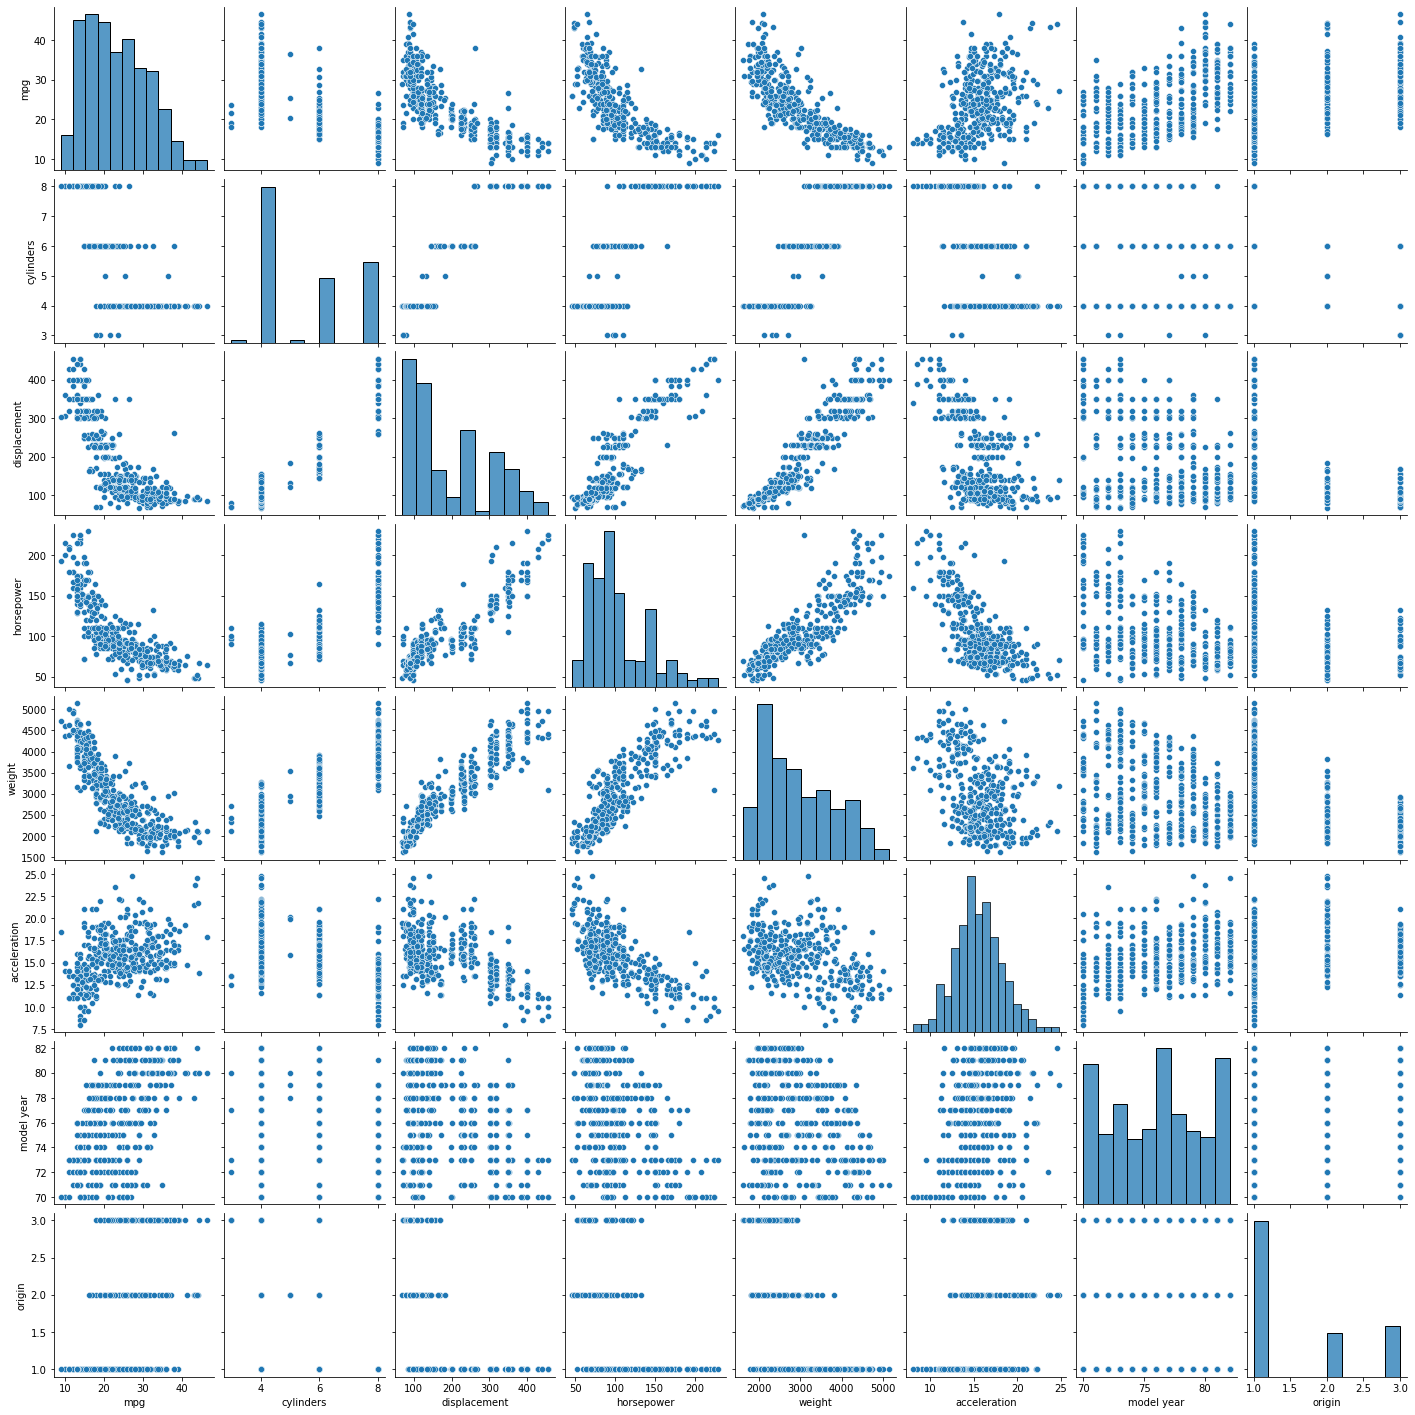

In [51]:
# Make a pairplot using seaborn to examine the relationships between variables
# Note - do this on the whole dataframe, not just independent variables
sns.pairplot(data=df)

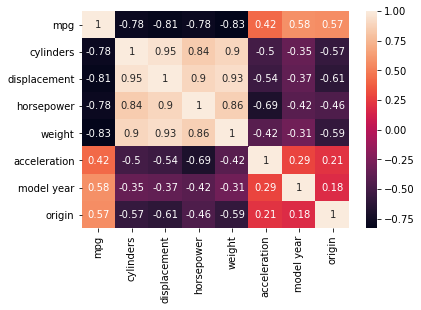

In [55]:
# Create a correlation heatmap as well, with seaborn plus the 'corr' function
sns.heatmap(df.corr(), annot=True);

### Task 11: Explore your variables

Look at both at the pairplot and the correlation heatmap - what are some trends you see? Any potential problems?

Here, we expect you to look at what kinds of data you have. You may also want to discuss how the data is distributed. Analyze both the relationships between independent variables and the relationships between independent variables and your target/dependent variable (miles per gallon).

In [56]:
call_on_students(1)

['Gideon']


**Observations:**

- Weight has the strongest correlation (negative)
- Target (mpg) is mostly normally distributed
- We have a lot of collinearity going on, need to be worried about mutlicollinearity for a mlr


### Task 12: Pick one X variable and model

Pick the variable you think would be best to use to predict MPG, and create, fit and summarize the output of a statsmodels OLS model!

Set the summary output equal to `simple_model_summary`

In [57]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [59]:
call_on_students(1)

['Alison']


In [65]:
X = df['weight']
X

0      3504
1      3693
2      3436
3      3433
4      3449
       ... 
387    2790
388    2130
389    2295
390    2625
391    2720
Name: weight, Length: 392, dtype: int64

In [68]:
x_con = sm.add_constant(X)

In [67]:
import numpy as np

In [70]:
x_test = np.array(x_con)

In [72]:
# This would work as well for x
x_test

array([[1.000e+00, 3.504e+03],
       [1.000e+00, 3.693e+03],
       [1.000e+00, 3.436e+03],
       [1.000e+00, 3.433e+03],
       [1.000e+00, 3.449e+03],
       [1.000e+00, 4.341e+03],
       [1.000e+00, 4.354e+03],
       [1.000e+00, 4.312e+03],
       [1.000e+00, 4.425e+03],
       [1.000e+00, 3.850e+03],
       [1.000e+00, 3.563e+03],
       [1.000e+00, 3.609e+03],
       [1.000e+00, 3.761e+03],
       [1.000e+00, 3.086e+03],
       [1.000e+00, 2.372e+03],
       [1.000e+00, 2.833e+03],
       [1.000e+00, 2.774e+03],
       [1.000e+00, 2.587e+03],
       [1.000e+00, 2.130e+03],
       [1.000e+00, 1.835e+03],
       [1.000e+00, 2.672e+03],
       [1.000e+00, 2.430e+03],
       [1.000e+00, 2.375e+03],
       [1.000e+00, 2.234e+03],
       [1.000e+00, 2.648e+03],
       [1.000e+00, 4.615e+03],
       [1.000e+00, 4.376e+03],
       [1.000e+00, 4.382e+03],
       [1.000e+00, 4.732e+03],
       [1.000e+00, 2.130e+03],
       [1.000e+00, 2.264e+03],
       [1.000e+00, 2.228e+03],
       [

In [74]:
# Either define X and y (if using OLS) or define your formula (if using ols)
# Make sure that if you use OLS to add a constant to your X!
most_cor = 'weight'
X = df['weight']
y = df['mpg']

simple_model = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()

In [75]:
simple_model_summary = simple_model.summary() 
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Thu, 23 Mar 2023   Prob (F-statistic):          6.02e-102
Time:                        16:49:52   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Task 13: Interpret!

In [76]:
call_on_students(1)

['Max']


There are many things you could observe from this output, but I want especially for you to make an inference about the relationship between the X variable and MPG.

- R2 = .693, weight explains 69% of the variance in mpg
- Weight coef = -.0076, on average mpg will decrease by .0076 for every 1 unit increase in weight


### Task 14: Model with all numeric X variables

Create, fit and summarize the output of a statsmodels OLS model that has all of the possible X variables in our dataset!

Set the summary output equal to `model_summary`

In [77]:
# Want to use 'cylinders', 'displacement', 'horsepower', 'weight' and 'acceleration'
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [78]:
call_on_students(1)

['Vlad']


In [86]:
x_mlr_2 = df.select_dtypes(include='number')
# WOuld still need to drop mpg, origin, model year
x_mlr_2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1
388,44.0,4,97.0,52,2130,24.6,82,2
389,32.0,4,135.0,84,2295,11.6,82,1
390,28.0,4,120.0,79,2625,18.6,82,1


In [91]:
list(df.columns[1:6])

['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

In [90]:
x_mlr_3 = df[df.columns[1:6]]
x_mlr_3

,cylinders,displacement,horsepower,weight,acceleration
0,8,307.0,130,3504,12.0
1,8,350.0,165,3693,11.5
2,8,318.0,150,3436,11.0
3,8,304.0,150,3433,12.0
4,8,302.0,140,3449,10.5
...,...,...,...,...,...
387,4,140.0,86,2790,15.6
388,4,97.0,52,2130,24.6
389,4,135.0,84,2295,11.6
390,4,120.0,79,2625,18.6


In [79]:
x_mlr = df.drop(columns=['model year', 'origin', 'car name', 'mpg'])

In [80]:
x_mlr.head()

,cylinders,displacement,horsepower,weight,acceleration
0,8,307.0,130,3504,12.0
1,8,350.0,165,3693,11.5
2,8,318.0,150,3436,11.0
3,8,304.0,150,3433,12.0
4,8,302.0,140,3449,10.5


In [81]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

In [83]:
# Either define X and y (if using OLS) or define your formula (if using ols)
# Make sure that if you use OLS to add a constant to your X! 
mlr_model = sm.OLS(endog=y, exog=sm.add_constant(x_mlr))
mlr_results = mlr_model.fit()

In [84]:
model_summary = mlr_results.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     186.9
Date:                Thu, 23 Mar 2023   Prob (F-statistic):          9.82e-101
Time:                        17:01:45   Log-Likelihood:                -1120.1
No. Observations:                 392   AIC:                             2252.
Df Residuals:                     386   BIC:                             2276.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           46.2643      2.669     17.331      0.000      41.016      51.513
cylinders       -0.3979      0.411     -0.969      0.333      -1.205       0.409
displacement -8.313e-05      0.009     -0.009      0.993      -0.018       0.018
horsepower      -0.0453      0.017     -2.716      0.007      -0.078      -0.012
weight          -0.0052      0.001     -6.351      0.000      -0.007      -0.004
acceleration    -0.0291      0.126     -0.231      0.817      -0.276       0.218
==============================================================================
Omnibus:                       38.561   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.737
Skew:                           0.706   Prob(JB):                     3.53e-12
Kurtosis:                       4.111   Cond. No.                     3.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Thu, 23 Mar 2023   Prob (F-statistic):          6.02e-102
Time:                        16:49:52   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Task 15: Interpret!


In [92]:
call_on_students(1)

['Anat']


Specifically, compare this model summary to your simple model's summary.

- adj-rsquared is higher in mlr, explaining more of the variance in mpg
- mlr model does have high multicollinearity, but we have features that are not significant and we could potentially drop (acceleration, cylinders, displacement)


In [107]:
df['car name'].value_counts()

ford pinto             5
toyota corolla         5
amc matador            5
toyota corona          4
chevrolet impala       4
                      ..
datsun 310 gx          1
amc concord d/l        1
maxda glc deluxe       1
ford futura            1
chevrolet vega 2300    1
Name: car name, Length: 301, dtype: int64

In [97]:
df['model year'].value_counts()

73    40
78    36
76    34
82    30
75    30
79    29
70    29
81    28
77    28
72    28
80    27
71    27
74    26
Name: model year, dtype: int64

In [102]:
df['model year'].nunique()
# How many extra columns?  12

13

In [100]:
df['origin'].nunique()
# How many? 2

3

In [101]:
df['car name'].nunique()
# How many? 300

301

In [111]:
pd.get_dummies(df['model year'], drop_first=True)

,71,72,73,74,75,76,77,78,79,80,81,82
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
387,0,0,0,0,0,0,0,0,0,0,0,1
388,0,0,0,0,0,0,0,0,0,0,0,1
389,0,0,0,0,0,0,0,0,0,0,0,1
390,0,0,0,0,0,0,0,0,0,0,0,1


In [112]:
# 73 would be a good year to manually drop (it is the most frequent)
x_dummies = pd.get_dummies(df['model year'])

In [116]:
x_dummies.drop(columns=[73], inplace=True)
x_dummies

,70,71,72,74,75,76,77,78,79,80,81,82
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
387,0,0,0,0,0,0,0,0,0,0,0,1
388,0,0,0,0,0,0,0,0,0,0,0,1
389,0,0,0,0,0,0,0,0,0,0,0,1
390,0,0,0,0,0,0,0,0,0,0,0,1


In [117]:
# car name
pd.get_dummies(df['car name'])

,amc ambassador brougham,amc ambassador dpl,amc ambassador sst,amc concord,amc concord d/l,amc concord dl 6,amc gremlin,amc hornet,amc hornet sportabout (sw),amc matador,...,volvo 145e (sw),volvo 244dl,volvo 245,volvo 264gl,volvo diesel,vw dasher (diesel),vw pickup,vw rabbit,vw rabbit c (diesel),vw rabbit custom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
sm.OLS(df['mpg'], sm.add_constant(pd.get_dummies(df['car name'], drop_first=True))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     8.963
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           1.29e-25
Time:                        17:29:46   Log-Likelihood:                -691.02
No. Observations:                 392   AIC:                             1984.
Df Residuals:                      91   BIC:                             3179.
Df Model:                         300                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   13.0000      2.927      4.441      0.000       7.185      18.815
amc ambassador dpl                       2.0000      4.140      0.483      0.630      -6.223      10.223
amc ambassador sst                       4.0000      4.140      0.966      0.336      -4.223      12.223
amc concord                              8.8500      3.585      2.469      0.015       1.729      15.971
amc concord d/l                          5.1000      4.140      1.232      0.221      -3.123      13.323
amc concord dl 6                         7.2000      4.140      1.739      0.085      -1.023      15.423
amc gremlin                              6.5000      3.273      1.986      0.050      -0.001      13.001
amc hornet                               6.3750      3.273      1.948      0.055      -0.126      12.876
amc hornet sportabout (sw)               5.0000      4.140      1.208      0.230      -3.223      13.223
amc matador                              2.7000      3.207      0.842      0.402      -3.670       9.070
amc matador (sw)                         1.5000      3.585      0.418      0.677      -5.621       8.621
amc pacer                                6.0000      4.140      1.449      0.151      -2.223      14.223
amc pacer d/l                            4.5000      4.140      1.087      0.280      -3.723      12.723
amc rebel sst                            3.0000      4.140      0.725      0.471      -5.223      11.223
amc spirit dl                           14.4000      4.140      3.478      0.001       6.177      22.623
audi 100 ls                             11.0000      4.140      2.657      0.009       2.777      19.223
audi 100ls                               8.5000      3.585      2.371      0.020       1.379      15.621
audi 4000                               21.3000      4.140      5.145      0.000      13.077      29.523
audi 5000                                7.3000      4.140      1.763      0.081      -0.923      15.523
audi 5000s (diesel)                     23.4000      4.140      5.653      0.000      15.177      31.623
audi fox                                16.0000      4.140      3.865      0.000       7.777      24.223
bmw 2002                                13.0000      4.140      3.140      0.002       4.777      21.223
bmw 320i                                 8.5000      4.140      2.053      0.043       0.277      16.723
buick century                            6.7000      3.585      1.869      0.065      -0.421      13.821
buick century 350                     4.974e-14      4.140    1.2e-14      1.000      -8.223       8.223
buick century limited                   12.0000      4.140      2.899      0.005       3.777      20.223
buick century luxus (sw)              

<AxesSubplot:>

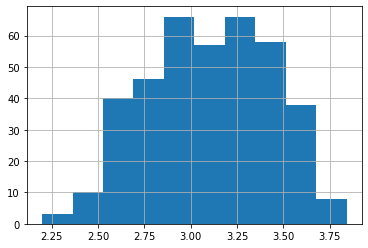

In [108]:
mpg_log = np.log(df['mpg'])
mpg_log.hist()

<AxesSubplot:>

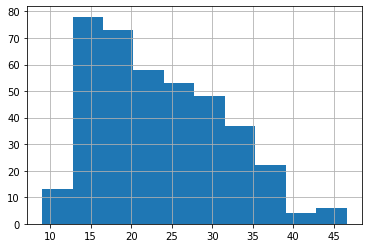

In [109]:
df['mpg'].hist()